In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# For uploading files in Google Colab
from google.colab import files

# Upload your files (CSV files from your local machine)
uploaded = files.upload()


Saving bonnLabels_shortSignal.csv to bonnLabels_shortSignal.csv
Saving bonnLabels_fullSignal.csv to bonnLabels_fullSignal.csv
Saving bonn_fullSignal.csv to bonn_fullSignal.csv
Saving bonn_shortSignal.csv to bonn_shortSignal.csv


### **SHORT SIGNAL**

READ AND EDA

In [ ]:
import pandas as pd

# Read the datasets
signal_data = pd.read_csv('bonn_shortSignal.csv', header=None)
labels_data = pd.read_csv('bonnLabels_shortSignal.csv', header=None)

signal_data.columns = [f"Signal_{i}" for i in range(1, signal_data.shape[1] + 1)]
labels_data.columns = ['Original_Label', 'Mapped_Label']

signal_data_info = signal_data.info()
labels_data_info = labels_data.info()

signal_data_head = signal_data.head()
labels_data_head = labels_data.head()

signal_data_info, signal_data_head, labels_data_info, labels_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 174 entries, Signal_1 to Signal_174
dtypes: float64(174)
memory usage: 15.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original_Label  11500 non-null  object
 1   Mapped_Label    11500 non-null  object
dtypes: object(2)
memory usage: 179.8+ KB


(None,
    Signal_1  Signal_2  Signal_3  Signal_4  Signal_5  Signal_6  Signal_7  \
 0  0.389610  0.533121  0.498036  0.419592  0.398911  0.405815  0.386652   
 1  0.602793  0.428841  0.236239  0.208060  0.250670  0.262922  0.296892   
 2  0.571000  0.572239  0.604899  0.572349  0.529587  0.558042  0.604481   
 3 -0.215483 -0.121934 -0.110209 -0.101446 -0.214117 -0.208932 -0.234418   
 4 -0.414488 -0.372954 -0.300484 -0.077387  0.055048  0.214900  0.275198   
 
    Signal_8  Signal_9  Signal_10  ...  Signal_165  Signal_166  Signal_167  \
 0  0.372248  0.396528   0.384038  ...    0.678772    0.602793    0.428841   
 1  0.218618  0.230548   0.226549  ...    0.550411    0.571000    0.572239   
 2  0.652491  0.574076   0.489193  ...   -0.345953   -0.215483   -0.121934   
 3 -0.149706 -0.008444   0.107252  ...   -0.286705   -0.414488   -0.372954   
 4  0.156733  0.148367   0.176726  ...    0.257486    0.138119   -0.090036   
 
    Signal_168  Signal_169  Signal_170  Signal_171  Signal_172  S

In [ ]:
labels_data.columns = ['Original_Label', 'Mapped_Label']
labels_data = labels_data.drop(columns=['Original_Label'])

label_counts = labels_data['Mapped_Label'].value_counts()

label_counts

,count
Mapped_Label,
N,9200
SZ,2300


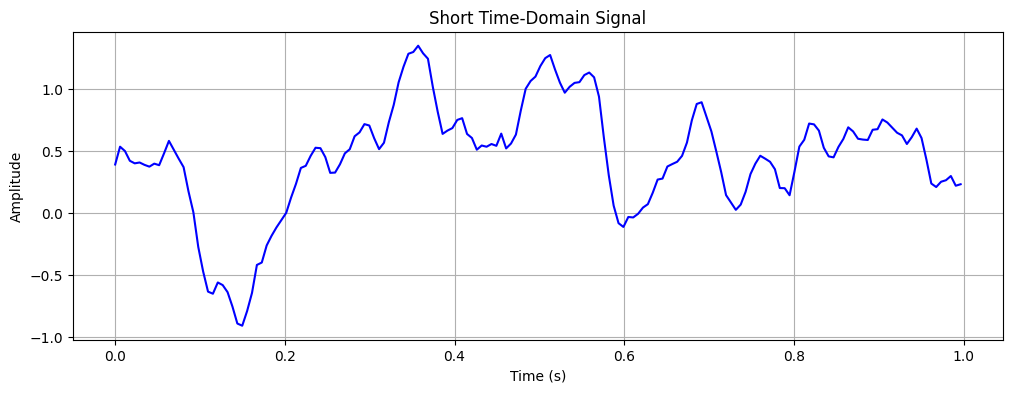

In [ ]:
def plot_eeg_like_wave(signal, title="EEG Waveform"):
    plt.figure(figsize=(12, 4))
    time = np.arange(len(signal)) / 173.61  # Convert indices to time (assuming fs=173.61 Hz)
    plt.plot(time, signal, color='b')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Example: Plot the first signal in the dataset
example_signal = signal_data.iloc[0, :].values  # First row of the dataset
plot_eeg_like_wave(example_signal, title="Short Time-Domain Signal")


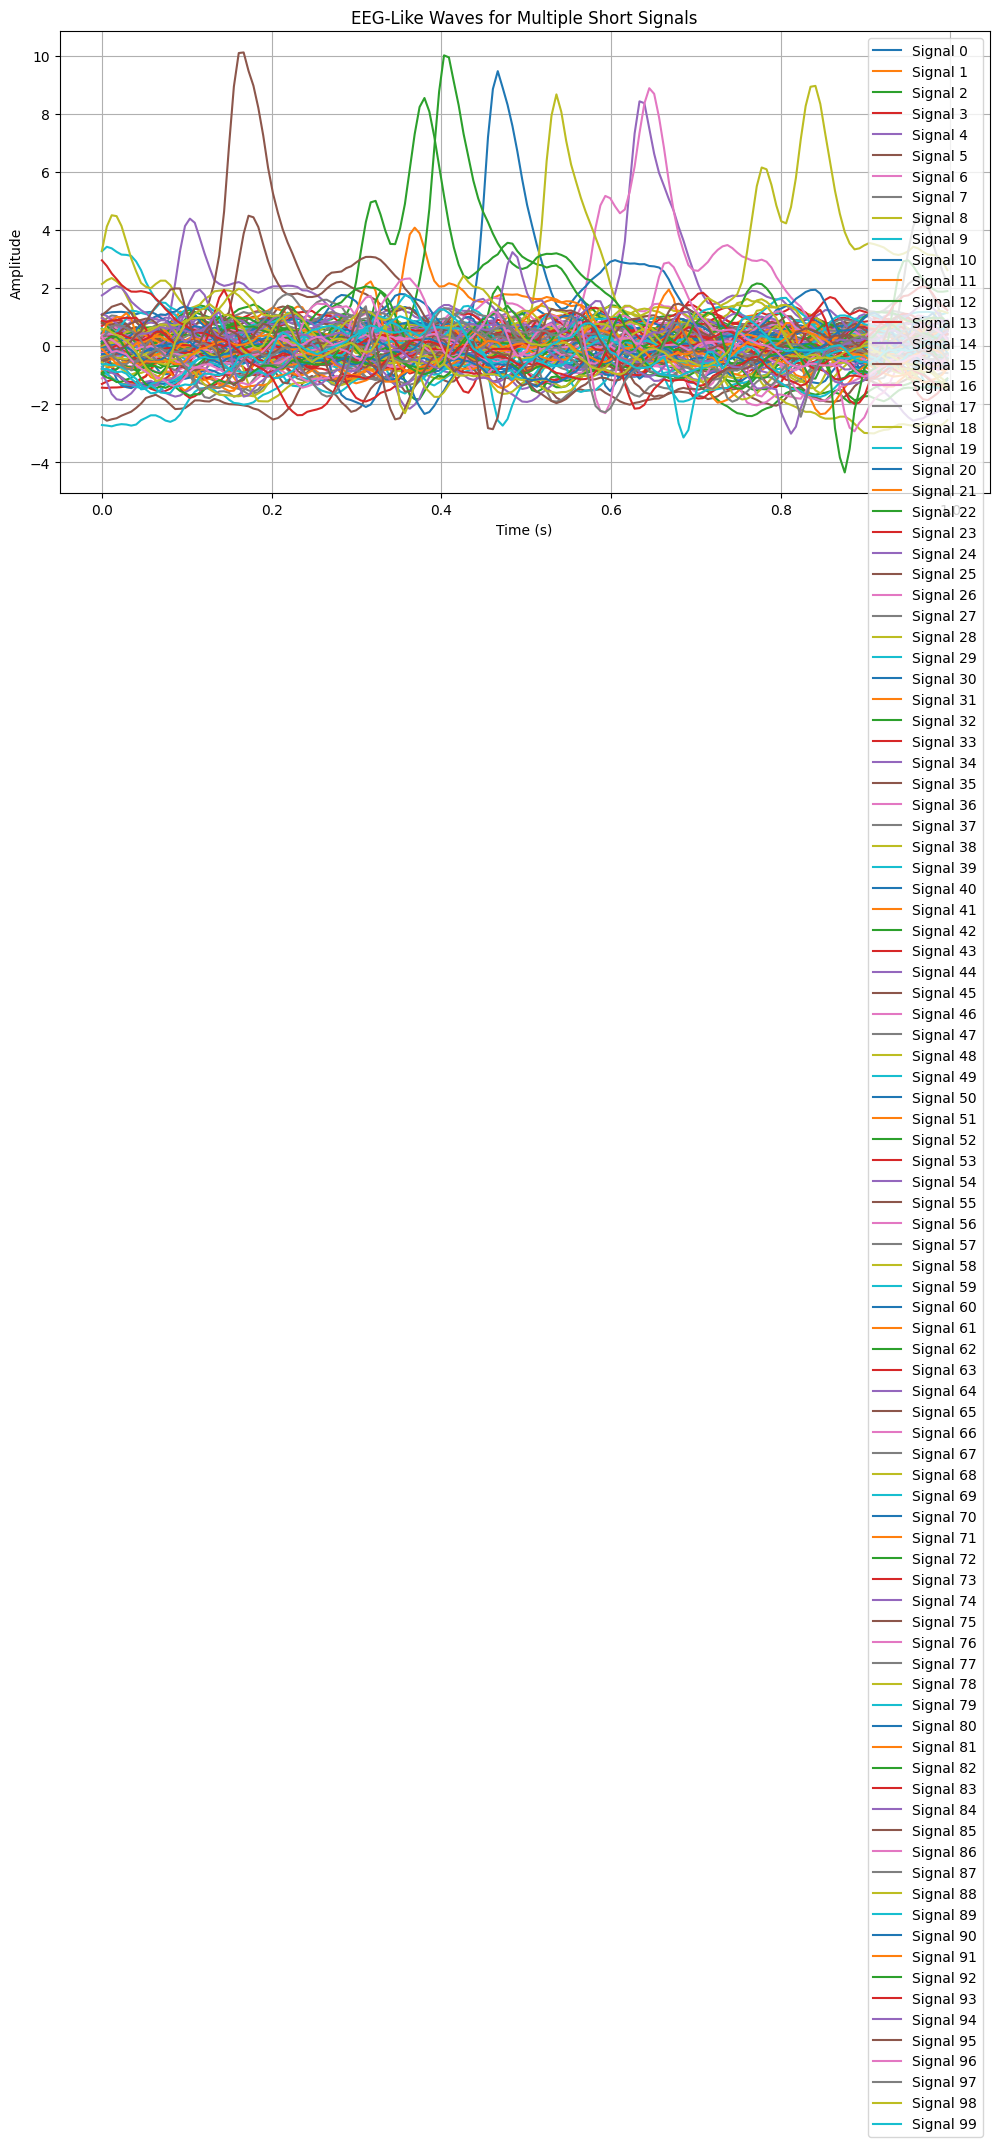

In [ ]:
# Overlay multiple signals for comparison
def plot_multiple_eeg_waves(data, num_signals=10):
    plt.figure(figsize=(12, 6))
    for idx in range(num_signals):
        signal = data.iloc[idx, :].values
        time = np.arange(len(signal)) / 173.61
        plt.plot(time, signal, label=f"Signal {idx}")
    plt.title("EEG-Like Waves for Multiple Short Signals")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

# Call the function to visualize the first 5 signals
plot_multiple_eeg_waves(signal_data, num_signals=100)


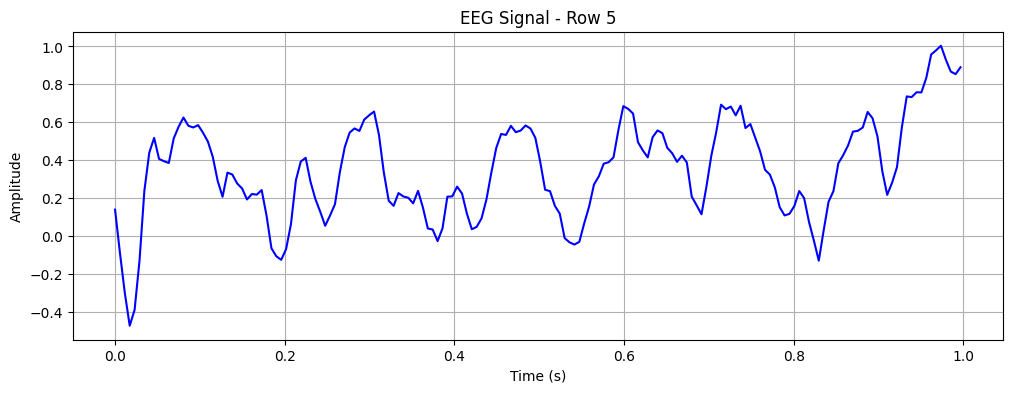

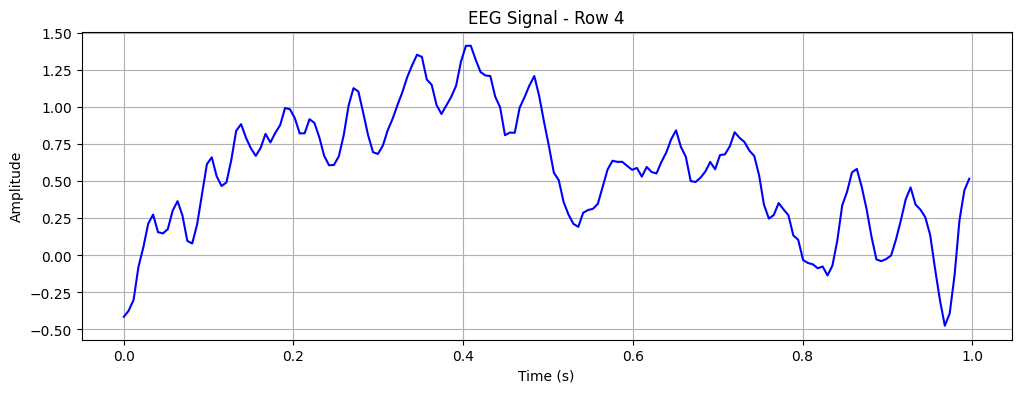

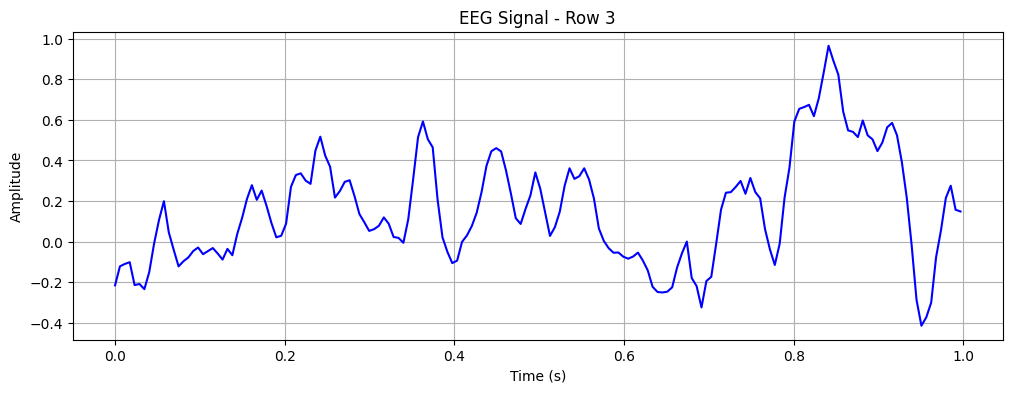

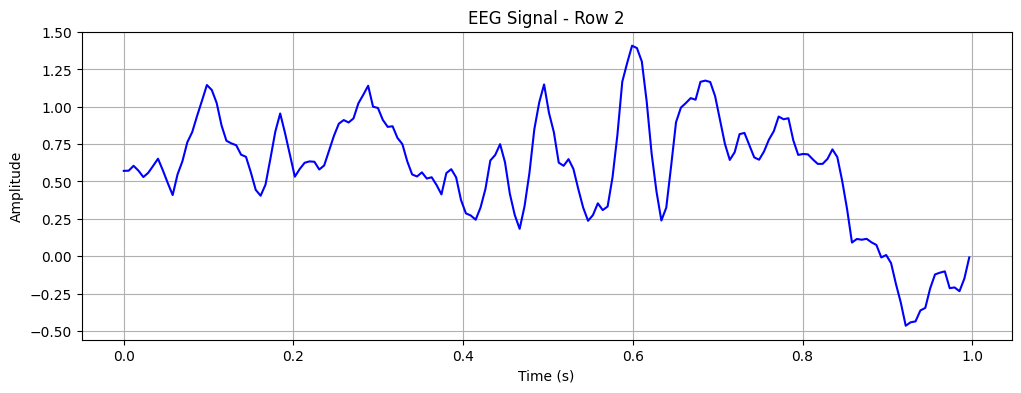

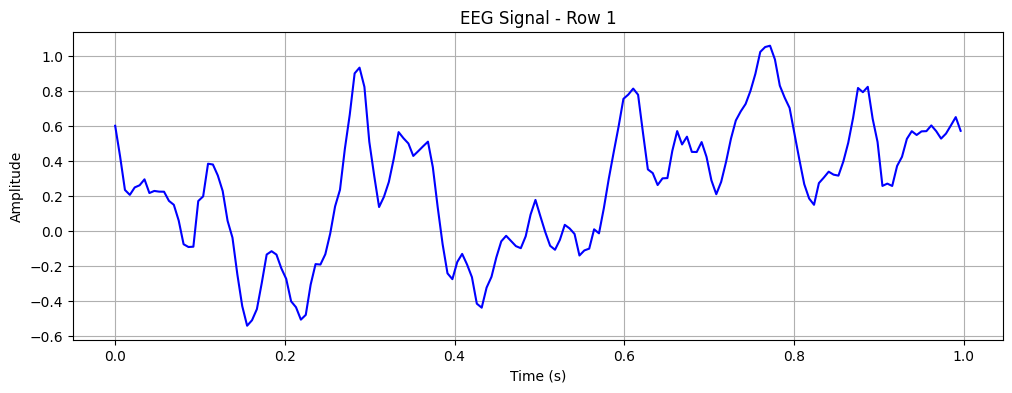

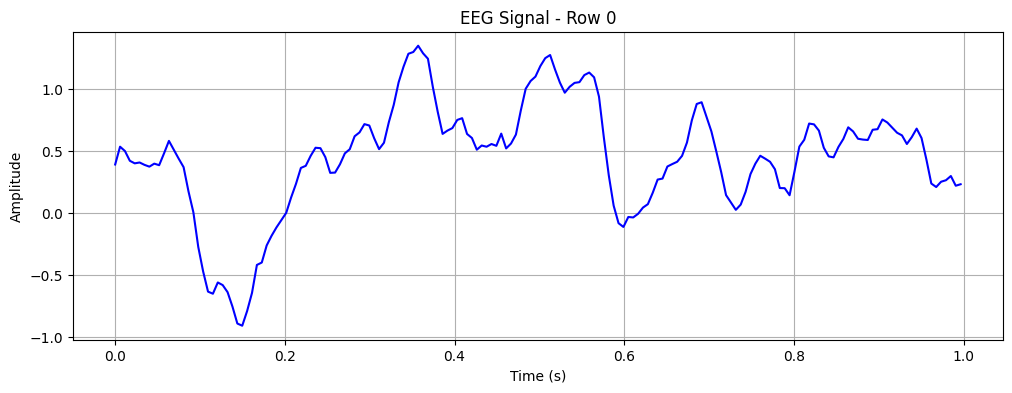

In [ ]:
def plot_eeg_signals_range(data, start_idx, end_idx, fs=173.61):
    for idx in range(start_idx, end_idx - 1, -1):  # Iterate in reverse
        signal = data.iloc[idx, :].values
        time = np.arange(len(signal)) / fs  # Time in seconds
        plt.figure(figsize=(12, 4))
        plt.plot(time, signal, color='b')
        plt.title(f"EEG Signal - Row {idx}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.show()

plot_eeg_signals_range(signal_data, start_idx=5, end_idx=0)


In [ ]:
signal_data.columns = [f"Signal_{i}" for i in range(1, signal_data.shape[1] + 1)]
signal_data['Mapped_Label'] = labels_data['Mapped_Label']
signal_data.head()


,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10,...,Signal_166,Signal_167,Signal_168,Signal_169,Signal_170,Signal_171,Signal_172,Signal_173,Signal_174,Mapped_Label
0,0.389610,0.533121,0.498036,0.419592,0.398911,0.405815,0.386652,0.372248,0.396528,0.384038,...,0.602793,0.428841,0.236239,0.208060,0.250670,0.262922,0.296892,0.218618,0.230548,N
1,0.602793,0.428841,0.236239,0.208060,0.250670,0.262922,0.296892,0.218618,0.230548,0.226549,...,0.571000,0.572239,0.604899,0.572349,0.529587,0.558042,0.604481,0.652491,0.574076,N
2,0.571000,0.572239,0.604899,0.572349,0.529587,0.558042,0.604481,0.652491,0.574076,0.489193,...,-0.215483,-0.121934,-0.110209,-0.101446,-0.214117,-0.208932,-0.234418,-0.149706,-0.008444,N
3,-0.215483,-0.121934,-0.110209,-0.101446,-0.214117,-0.208932,-0.234418,-0.149706,-0.008444,0.107252,...,-0.414488,-0.372954,-0.300484,-0.077387,0.055048,0.214900,0.275198,0.156733,0.148367,N
4,-0.414488,-0.372954,-0.300484,-0.077387,0.055048,0.214900,0.275198,0.156733,0.148367,0.176726,...,0.138119,-0.090036,-0.301792,-0.474643,-0.390980,-0.132580,0.237660,0.438723,0.517196,N


# **MODEL IMPLEMENTATION**

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

data = signal_data.copy()

# Map labels to numeric values
label_mapping = {'N': 0, 'SZ': 1}  # Non-Seizure: 0, Seizure: 1
data['Mapped_Label'] = data['Mapped_Label'].map(label_mapping)

# Split features and labels
X = data.drop(columns=['Mapped_Label']).values
y = data['Mapped_Label'].values

# Reshape X for CNN input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert labels to categorical format
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

#CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_cat, epochs=18, batch_size=32, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, target_names=['Non-Seizure', 'Seizure'])

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8634 - loss: 0.2857 - val_accuracy: 0.9774 - val_loss: 0.0650
Epoch 2/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9719 - loss: 0.0663 - val_accuracy: 0.9809 - val_loss: 0.0557
Epoch 3/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0545 - val_accuracy: 0.9826 - val_loss: 0.0457
Epoch 4/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0441 - val_accuracy: 0.9843 - val_loss: 0.0382
Epoch 5/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0322 - val_accuracy: 0.9843 - val_loss: 0.0345
Epoch 6/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0238 - val_accuracy: 0.9878 - val_loss: 0.0309
Epoch 7/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9861 - val_loss: 0.0352
Epoch 8/18
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0181 - val_accuracy: 

Number of misclassified samples: 3


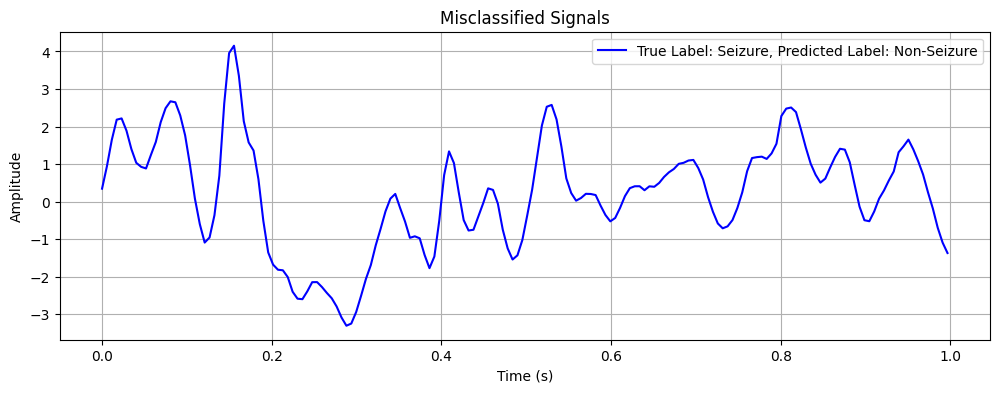

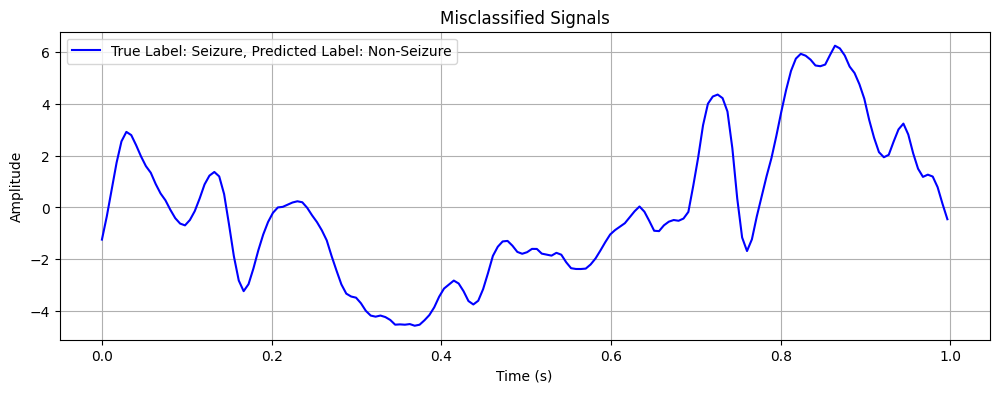

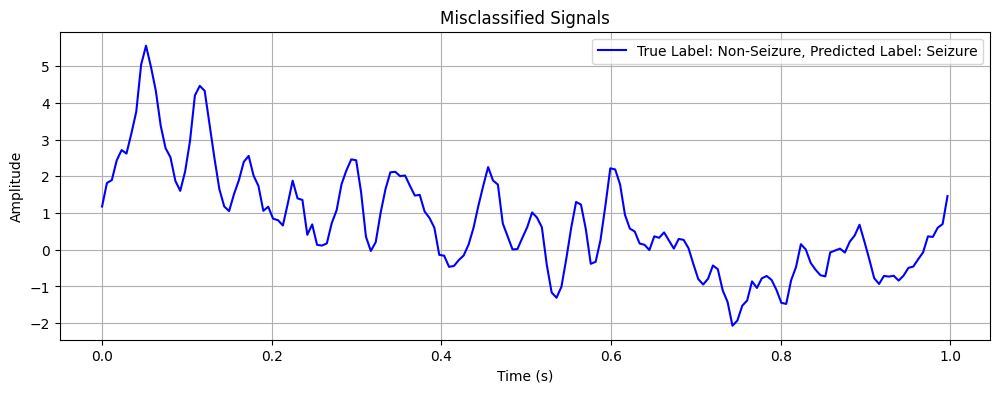

In [ ]:
def plot_eeg_like_wave(signal, title="EEG Waveform", true_label=None, pred_label=None):
    plt.figure(figsize=(12, 4))
    time = np.arange(len(signal)) / 173.61  # Convert indices to time (assuming fs=173.61 Hz)
    plt.plot(time, signal, color='b', label='EEG Signal')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    if true_label is not None and pred_label is not None:
        plt.legend([f"True Label: {true_label}, Predicted Label: {pred_label}"])
    plt.show()

# Identify misclassified indices
misclassified_indices = np.where(y_test != y_pred_classes)[0]

# Count of misclassified samples
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# Visualize misclassified samples
for idx in misclassified_indices[:7]:  # Visualize up to 5 misclassified samples
    signal = X_test[idx].squeeze()
    true_label = 'Non-Seizure' if y_test[idx] == 0 else 'Seizure'
    pred_label = 'Non-Seizure' if y_pred_classes[idx] == 0 else 'Seizure'
    plot_eeg_like_wave(signal, title=f"Misclassified Signals", true_label=true_label, pred_label=pred_label)


### **FULL SIGNAL**

In [ ]:
import pandas as pd

# Read the datasets
full_signal_data = pd.read_csv('bonn_fullSignal.csv', header=None)
full_labels_data = pd.read_csv('bonnLabels_fullSignal.csv', header=None)

# Assign column names to signal_data
full_signal_data.columns = [f"Signal_{i}" for i in range(1, full_signal_data.shape[1] + 1)]

# Assign meaningful column names to labels_data
full_labels_data.columns = ['Original_Label', 'Mapped_Label']

# Display basic information about the datasets
full_signal_data_info = full_signal_data.info()
full_labels_data_info = full_labels_data.info()

# Display the first few rows of both datasets
full_signal_data_head = full_signal_data.head()
full_labels_data_head = full_labels_data.head()

full_signal_data_info, full_signal_data_head, full_labels_data_info, full_labels_data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 4097 entries, Signal_1 to Signal_4097
dtypes: int64(4097)
memory usage: 15.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original_Label  500 non-null    object
 1   Mapped_Label    500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


(None,
    Signal_1  Signal_2  Signal_3  Signal_4  Signal_5  Signal_6  Signal_7  \
 0        34        33        28        22        21        22        22   
 1        60        47        38        29        28        30        28   
 2        26        16        13        12        17        16         7   
 3       -41       -42       -48       -48       -48       -45       -44   
 4        13         6        -1       -13       -29       -42       -53   
 
    Signal_8  Signal_9  Signal_10  ...  Signal_4088  Signal_4089  Signal_4090  \
 0        19        22         18  ...           21           24           15   
 1        30        36         51  ...          546          450          366   
 2        -6       -19        -25  ...           56           70           77   
 3       -36       -42        -43  ...           -4           -4          -11   
 4       -71       -86        -94  ...          -75          -37           36   
 
    Signal_4091  Signal_4092  Signal_4093  Sign

In [ ]:
full_labels_data.columns = ['Original_Label', 'Mapped_Label']
full_labels_data = full_labels_data.drop(columns=['Original_Label'])

# Perform EDA on the 'Mapped_Label' column
full_label_counts = full_labels_data['Mapped_Label'].value_counts()

full_label_counts

,count
Mapped_Label,
N,400
SZ,100


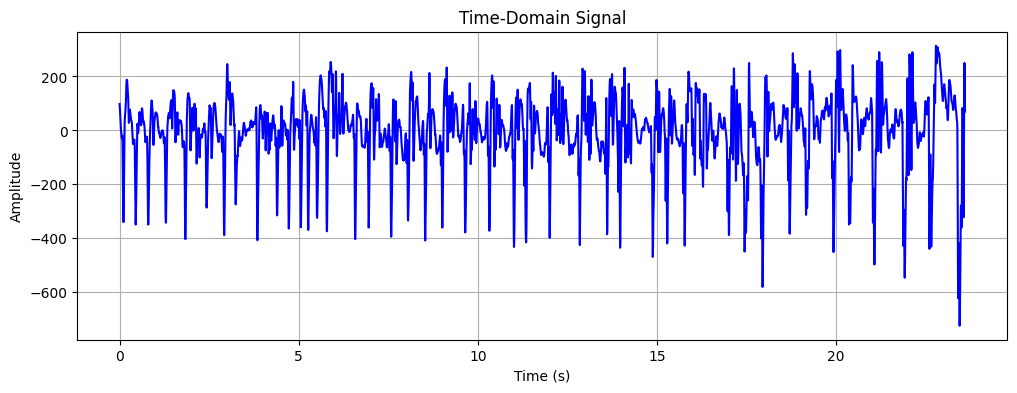

In [ ]:
def plot_eeg_like_wave(signal, title="EEG Waveform"):
    plt.figure(figsize=(12, 4))
    time = np.arange(len(signal)) / 173.61  # Convert indices to time (assuming fs=512 Hz)
    plt.plot(time, signal, color='b')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Example: Plot the first signal in the dataset
full_example_signal = full_signal_data.iloc[350, :].values  # First row of the dataset
plot_eeg_like_wave(full_example_signal, title="Time-Domain Signal")


In [ ]:
full_signal_data.columns = [f"Signal_{i}" for i in range(1, full_signal_data.shape[1] + 1)]
full_signal_data['Mapped_Label'] = full_labels_data['Mapped_Label']
full_signal_data.head()

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10,...,Signal_4089,Signal_4090,Signal_4091,Signal_4092,Signal_4093,Signal_4094,Signal_4095,Signal_4096,Signal_4097,Mapped_Label
0,34,33,28,22,21,22,22,19,22,18,...,24,15,22,31,40,45,39,41,7,N
1,60,47,38,29,28,30,28,30,36,51,...,450,366,296,248,209,177,149,126,42,N
2,26,16,13,12,17,16,7,-6,-19,-25,...,70,77,86,99,113,119,114,99,-130,N
3,-41,-42,-48,-48,-48,-45,-44,-36,-42,-43,...,-4,-11,-13,-15,-23,-28,-30,-23,-13,N
4,13,6,-1,-13,-29,-42,-53,-71,-86,-94,...,-37,36,86,139,167,175,161,129,1,N


In [ ]:
# Separate features and labels
signals = full_signal_data.iloc[:, :-1].values  # All columns except the last
labels = full_signal_data['Mapped_Label'].values

# Min-Max Scaling
signals_min = signals.min(axis=1, keepdims=True)
signals_max = signals.max(axis=1, keepdims=True)
normalized_signals = (signals - signals_min) / (signals_max - signals_min)

# Combine normalized signals with labels
normalized_data = pd.DataFrame(normalized_signals, columns=full_signal_data.columns[:-1])
normalized_data['Mapped_Label'] = labels

# Verify normalization
print(normalized_data.describe())


         Signal_1    Signal_2    Signal_3    Signal_4    Signal_5    Signal_6  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.510574    0.507335    0.503856    0.502213    0.502109    0.502238   
std      0.153310    0.163056    0.167677    0.166306    0.162252    0.159290   
min      0.116972    0.061189    0.034965    0.046358    0.013245    0.102649   
25%      0.403163    0.405903    0.400193    0.394000    0.393253    0.389752   
50%      0.515279    0.506195    0.503177    0.505909    0.501270    0.504221   
75%      0.615486    0.617736    0.613207    0.620750    0.621428    0.614360   
max      0.906745    0.941935    0.930792    0.887390    0.886675    0.892902   

         Signal_7    Signal_8    Signal_9   Signal_10  ...  Signal_4088  \
count  500.000000  500.000000  500.000000  500.000000  ...   500.000000   
mean     0.502773    0.503719    0.506813    0.507760  ...     0.506729   
std      0.159752    0.160465    0.162009    

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Map labels to numeric values
label_mapping = {'N': 0, 'SZ': 1}  # Non-Seizure: 0, Seizure: 1
normalized_data['Mapped_Label'] = normalized_data['Mapped_Label'].map(label_mapping)

# Split features and labels
X = normalized_data.iloc[:, :-1].values  # All columns except the last (Mapped_Label)
y = normalized_data['Mapped_Label'].values

# Reshape X for CNN input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert labels to categorical format
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=16,
                    validation_data=(X_val, y_val_cat), verbose=1,
                    callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, target_names=['Non-Seizure', 'Seizure'])

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7586 - loss: 0.8839 - val_accuracy: 0.8000 - val_loss: 0.6239
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8069 - loss: 0.4914 - val_accuracy: 0.8000 - val_loss: 0.5984
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7997 - loss: 0.4921 - val_accuracy: 0.8000 - val_loss: 0.5226
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8012 - loss: 0.4803 - val_accuracy: 0.8000 - val_loss: 0.5792
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8212 - loss: 0.4519 - val_accuracy: 0.8000 - val_loss: 0.5254
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8092 - loss: 0.4572 - val_accuracy: 0.8000 - val_loss: 0.5233
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8329 - loss: 0.3767 - val_accuracy: 0.8600 - val_loss: 0.4675
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8835 - loss: 0.3136 - val_accuracy: 0.8800 - val_loss: 0.

Number of misclassified samples: 5


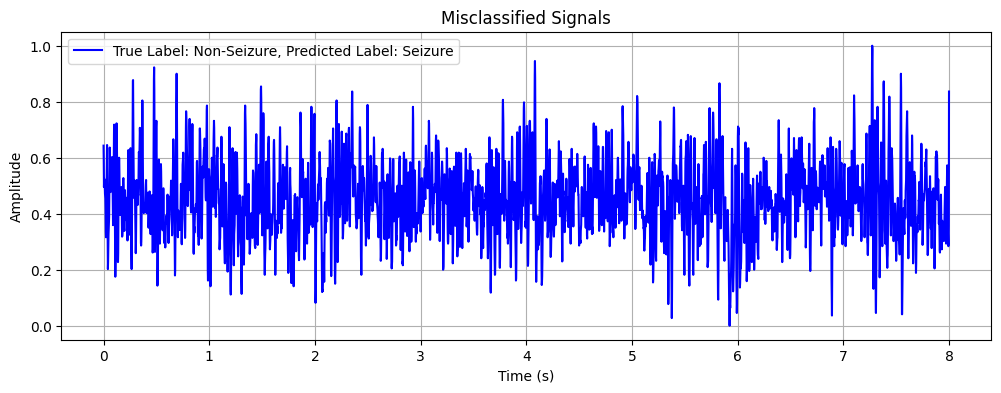

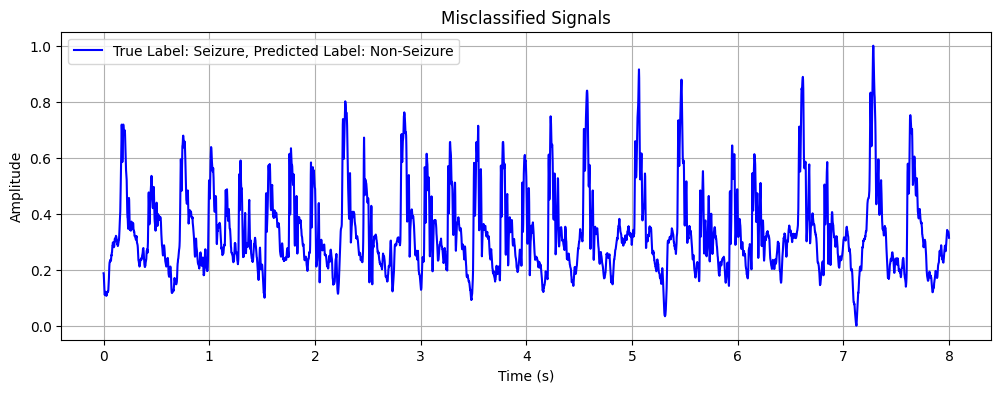

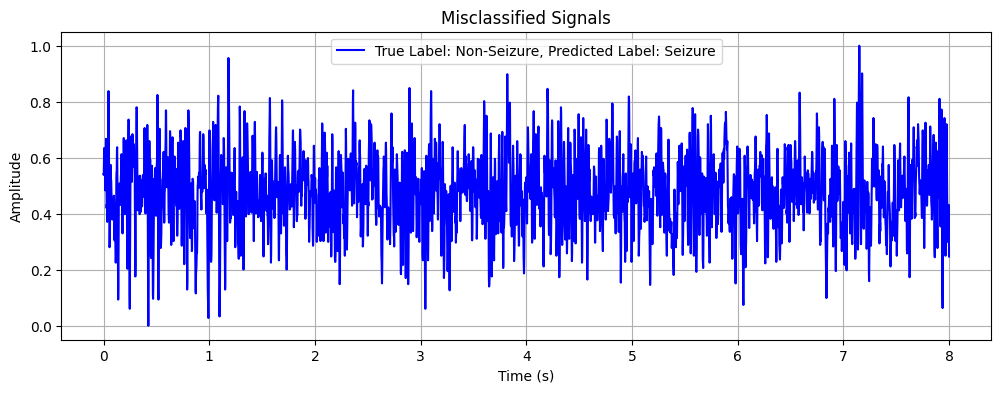

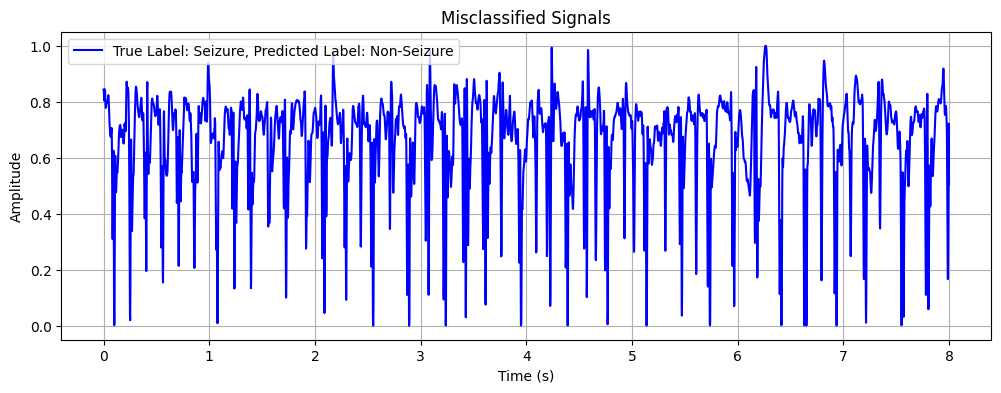

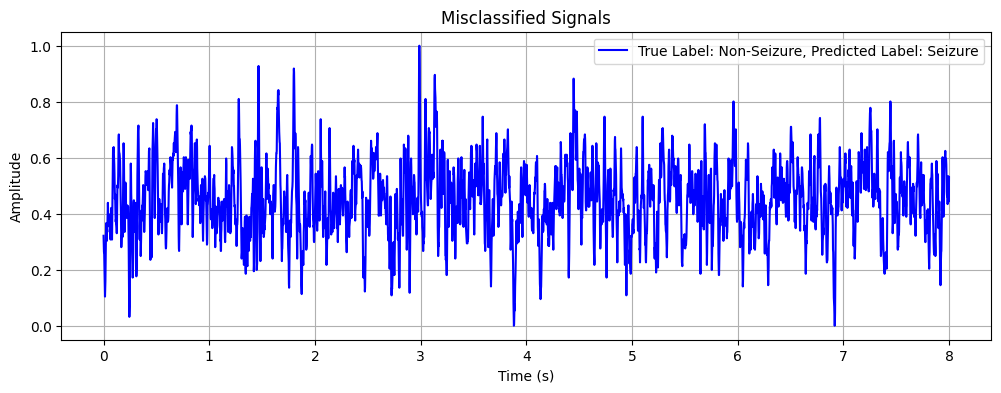

In [ ]:
def plot_eeg_like_wave(signal, title="EEG Waveform", true_label=None, pred_label=None):
    plt.figure(figsize=(12, 4))
    time = np.arange(len(signal)) /   # Convert indices to time (assuming fs=512 Hz)
    plt.plot(time, signal, color='b', label='EEG Signal')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    if true_label is not None and pred_label is not None:
        plt.legend([f"True Label: {true_label}, Predicted Label: {pred_label}"])
    plt.show()

# Identify misclassified indices
misclassified_indices = np.where(y_test != y_pred_classes)[0]

# Count of misclassified samples
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# Visualize misclassified samples
for idx in misclassified_indices[:7]:  # Visualize up to 5 misclassified samples
    signal = X_test[idx].squeeze()
    true_label = 'Non-Seizure' if y_test[idx] == 0 else 'Seizure'
    pred_label = 'Non-Seizure' if y_pred_classes[idx] == 0 else 'Seizure'
    plot_eeg_like_wave(signal, title=f"Misclassified Signals", true_label=true_label, pred_label=pred_label)
